<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [29]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [30]:
file_url = "../3.2-distribution/clean-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
1,1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041
2,2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
3,3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041
4,4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [31]:
filtered = df['Industry'].value_counts().reset_index()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Software Development'),
  Text(1, 0, 'Other:'),
  Text(2, 0, 'Fintech'),
  Text(3, 0, 'Internet, Telecomm or Information Services'),
  Text(4, 0, 'Banking/Financial Services'),
  Text(5, 0, 'Healthcare'),
  Text(6, 0, 'Manufacturing'),
  Text(7, 0, 'Retail and Consumer Services'),
  Text(8, 0, 'Government'),
  Text(9, 0, 'Media & Advertising Services'),
  Text(10, 0, 'Higher Education'),
  Text(11, 0, 'Transportation, or Supply Chain'),
  Text(12, 0, 'Computer Systems Design and Services'),
  Text(13, 0, 'Energy'),
  Text(14, 0, 'Insurance')])

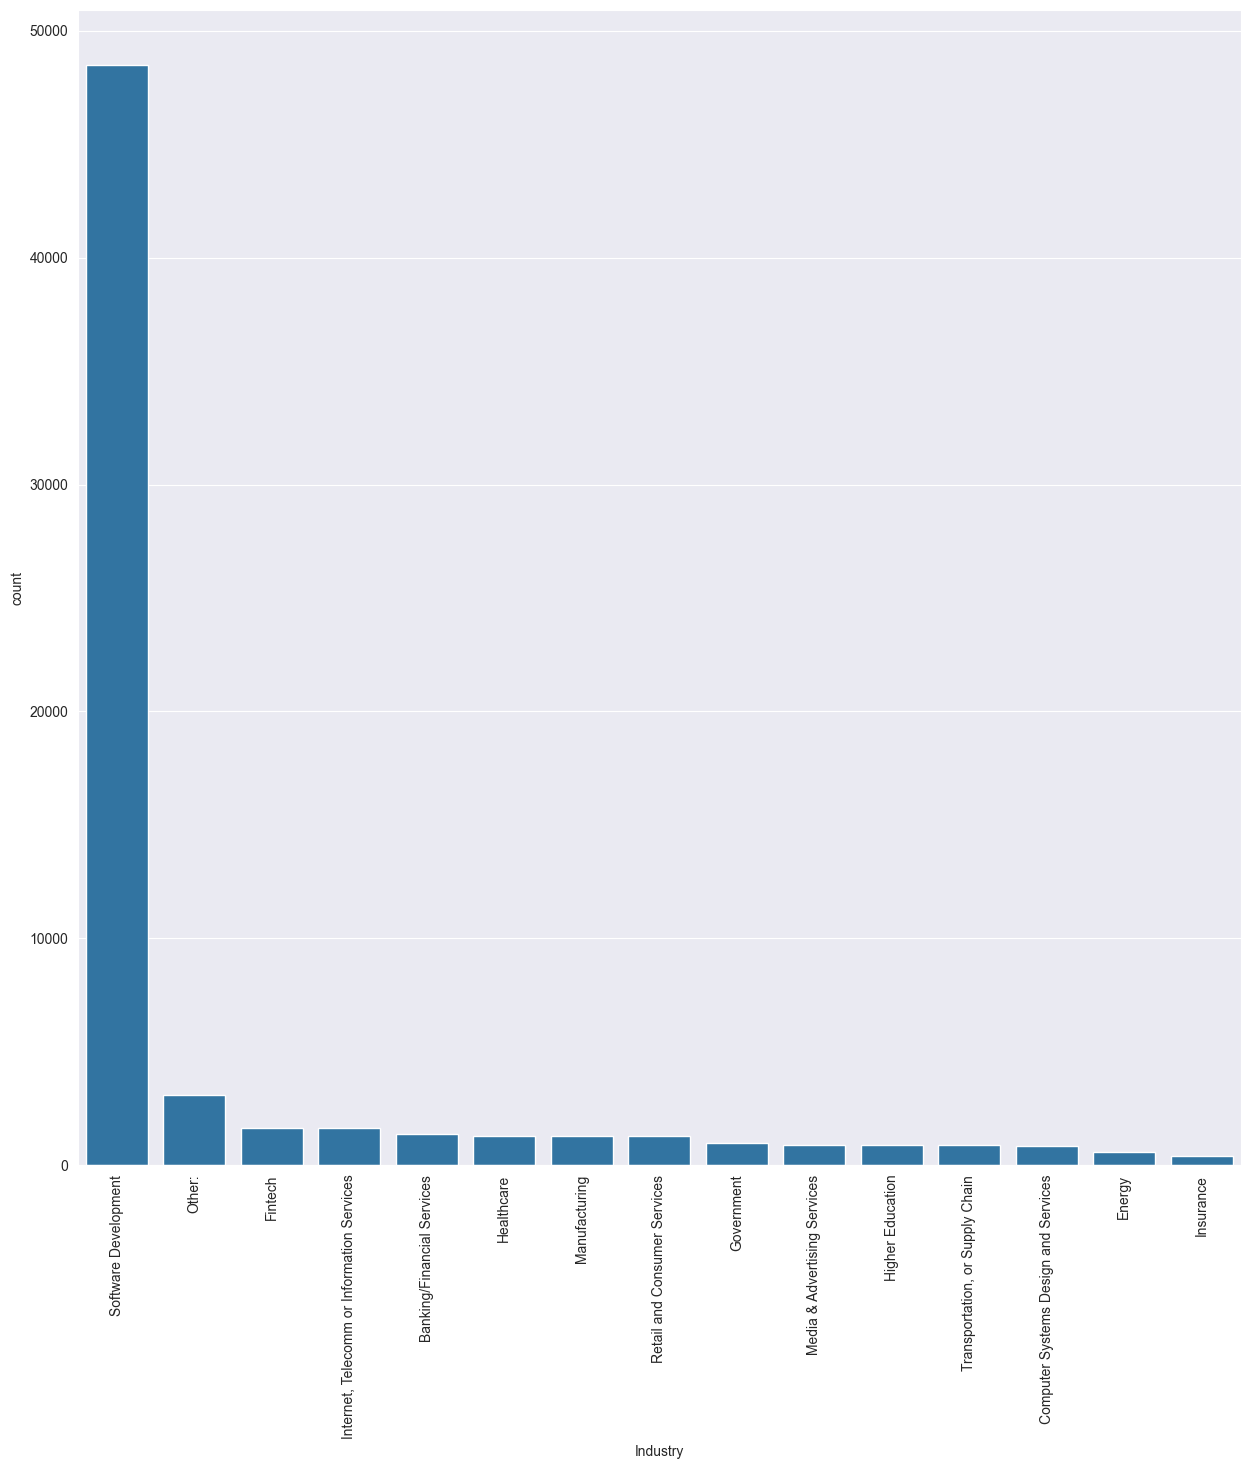

In [32]:
##Write your code here
plt.figure(figsize=(15,15))
sns.barplot(x="Industry", data=filtered, y="count")
plt.xticks(rotation=90)

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [33]:
df['ConvertedCompYearly'].describe()

count    6.543700e+04
mean     8.615529e+04
std      1.117614e+05
min      1.000000e+00
25%      8.615529e+04
50%      8.615529e+04
75%      8.615529e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [34]:
##Write your code here
mean_val = df['ConvertedCompYearly'].describe().loc['mean']
median_val = df['ConvertedCompYearly'].median
std_val = df['ConvertedCompYearly'].describe().loc['std']


In [35]:
treshold_val = mean_val+std_val
counter = 0
for i in range(len(df['ConvertedCompYearly'])):
    if df['ConvertedCompYearly'].iloc[i] > treshold_val:
        print(df['ConvertedCompYearly'].iloc[i])
        counter += 1
        
    if counter >= 3:
        break

230000.0
300000.0
254425.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Summary Statistics:
Q1: $86,155.29
Q3: $86,155.29
IQR: $0.00
Lower bound: $86,155.29
Upper bound: $86,155.29
Number of outliers: 23435
Percentage of outliers: 35.81%


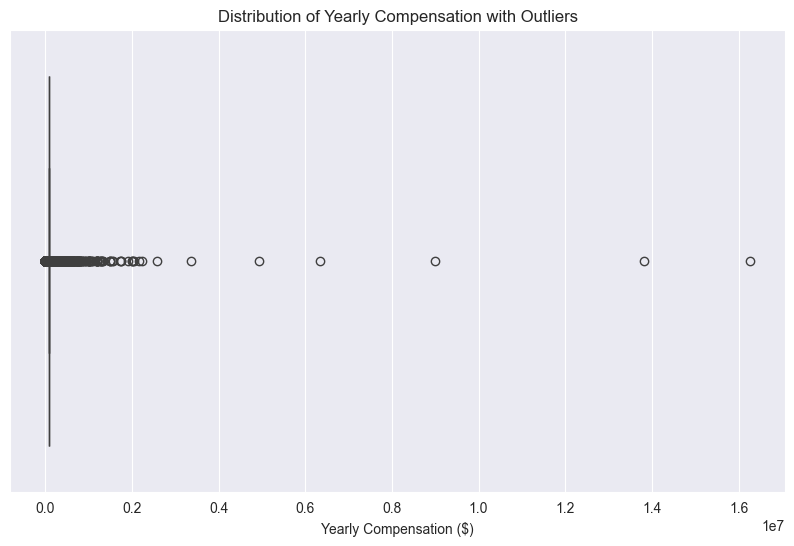

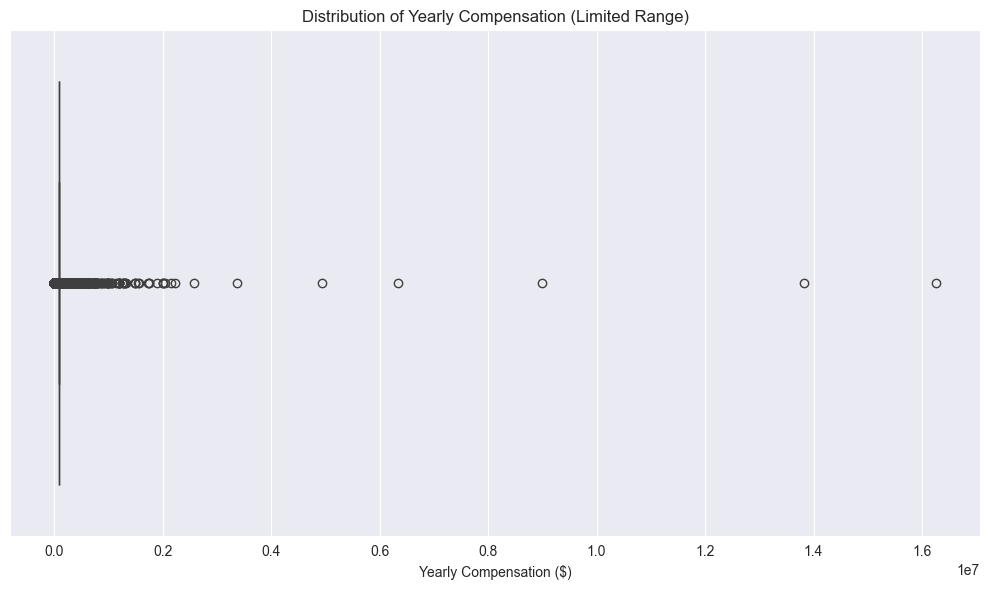

In [36]:
##Write your code here
# Calculate IQR and bounds
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]['ConvertedCompYearly']


print(f"Summary Statistics:")
print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")
print(f"Number of outliers: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df['ConvertedCompYearly'])*100):.2f}%")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Distribution of Yearly Compensation with Outliers')
plt.xlabel('Yearly Compensation ($)')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title('Distribution of Yearly Compensation (Limited Range)')
plt.xlabel('Yearly Compensation ($)')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [37]:
##Write your code here

Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_clean = df[(df['ConvertedCompYearly'] >= lower_bound) &
              (df['ConvertedCompYearly'] <= upper_bound)]


print(f"Original dataset size: {len(df)}")
print(f"Clean dataset size: {len(df_clean)}")
print(f"Number of rows removed: {len(df) - len(df_clean)}")
print(f"Percentage of data retained: {(len(df_clean)/len(df)*100):.2f}%")

Original dataset size: 65437
Clean dataset size: 42002
Number of rows removed: 23435
Percentage of data retained: 64.19%


In [38]:
df_clean

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
1,1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041
2,2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
3,3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041
4,4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
65433,65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
65434,65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041
65435,65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [39]:
##Write your code here
def get_age_midpoint(age_range):
    if age_range == 'Under 18 years old':
        return 17  # Assuming average of 0-17
    elif age_range == '65 years or older':
        return 75  # Assuming average of 65-85
    elif age_range == 'Prefer not to say':
        return None
    else:
        ages = [int(x) for x in age_range.split()[0].split('-')]
        return sum(ages) / 2

df_clean['Age_Numeric'] = df_clean['Age'].apply(get_age_midpoint)

In [40]:
df_clean

,Unnamed: 0,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_Numeric
0,0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,17.0
1,1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,39.5
2,2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,49.5
3,3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",...,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041,21.0
4,4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,21.0
65433,65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,29.5
65434,65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,29.5
65435,65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,21.0


In [41]:
df_clean.to_csv(path_or_buf='./modified-outliers-data.csv')

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
